In [18]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [19]:
X = np.load('./leabra/data_exports/x_4-1.npy')
Y = np.load('./leabra/data_exports/y_4-1.npy')

print(X.shape)
print(Y.shape)

(434, 100, 100, 3)
(434, 2)


In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
    pass

In [5]:
first_model = keras.Sequential()
# Note the input size (there is only one channel - intensity)
# these images... if you are using color images, your would
# need to set the last dimension of the input_shape to -3-
# above and this would carry over into this cell...
first_model.add(keras.layers.Conv2D(64, kernel_size=(4,4),
 activation='relu',
 input_shape=[X.shape[1],
 X.shape[2],
 X.shape[3]]))
first_model.add(keras.layers.Conv2D(64, (8,8), activation='relu'))
first_model.add(keras.layers.MaxPooling2D(pool_size=(4,4)))
first_model.add(keras.layers.Dropout(0.2))
first_model.add(keras.layers.Flatten())
first_model.add(keras.layers.Dense(64, activation='relu'))
first_model.add(keras.layers.Dropout(0.3))
first_model.add(keras.layers.Dense(Y.shape[1], activation='softmax'))
first_model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Adam(),
 metrics=[keras.metrics.CategoricalAccuracy()])
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 97, 97, 64)        3136      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        262208    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1982528   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [8]:
batch_size = 50
epochs = 50
history = first_model.fit(X, Y,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_split = 0.2)

Epoch 1/50
7/7 [==============================] - 2s 196ms/step - loss: 0.1143 - categorical_accuracy: 0.9625 - val_loss: 4.8116 - val_categorical_accuracy: 0.1724
Epoch 2/50
7/7 [==============================] - 0s 41ms/step - loss: 0.1224 - categorical_accuracy: 0.9510 - val_loss: 5.0094 - val_categorical_accuracy: 0.1724
Epoch 3/50
7/7 [==============================] - 0s 40ms/step - loss: 0.0929 - categorical_accuracy: 0.9654 - val_loss: 5.1861 - val_categorical_accuracy: 0.1724
Epoch 4/50
7/7 [==============================] - 0s 41ms/step - loss: 0.1067 - categorical_accuracy: 0.9568 - val_loss: 4.2742 - val_categorical_accuracy: 0.2874
Epoch 5/50
7/7 [==============================] - 0s 41ms/step - loss: 0.0967 - categorical_accuracy: 0.9625 - val_loss: 5.5721 - val_categorical_accuracy: 0.1609
Epoch 6/50
7/7 [==============================] - 0s 40ms/step - loss: 0.0766 - categorical_accuracy: 0.9683 - val_loss: 5.0797 - val_categorical_accuracy: 0.2529
Epoch 7/50
7/7 [=====

Test loss: 1.7620903253555298
Test accuracy: 0.8317972421646118


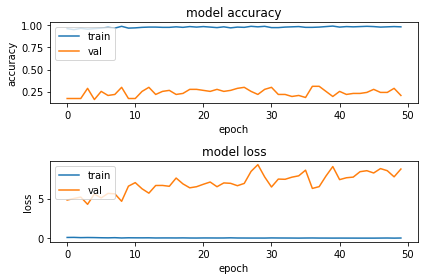

In [9]:
score = first_model.evaluate(X, Y, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

plt.figure(1) 

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

### Verify the predicitions being made
---

In [10]:
# Decode predictions didn't seem to work so well when not using
# xception network. This function should decode objects with 2 classes [0,1]
def decoder(one_pred):
    if one_pred[0] > one_pred[1]:
        return np.float32([1,0])
    else:
        return [0,1]

In [11]:
num_items = len(Y)
squat_preds = first_model.predict(X[0:num_items,:,:,:])

In [12]:
decoded = np.apply_along_axis(decoder, 1, squat_preds)

In [13]:
incorrect_squats = []
incorrect_non_squats = []
for i in range(100):
    if np.array_equal(decoded[i],Y[i]) == False:
        if Y[i][0] == 1:
            incorrect_non_squats.append(i)
        elif Y[i][1] == 0:
            incorrect_squats.append(i)

In [14]:
for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.show()
    
# No cats classified incorrectly

In [15]:
for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.show()